# PROYECTO 2 - Credit Card Payment
### Modelo RNA y preparacion para UI
María Inés Vásquez Figueroa 18250\
Diana Ximena de León Figueroa 18607\
María José Castro Lemus 181202\
Paula Camila González Ortega

In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.random import set_seed
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("./datafinal.csv")

In [6]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_sep,pay_ago,pay_jul,pay_jun,...,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_ago,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,payment_next_month,months_late
0,1,20000.0,1,2,0,24,2,2,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2
1,2,120000.0,1,2,1,26,0,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2
2,3,90000.0,1,2,1,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,1,2,0,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,0,2,0,57,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


## Procesamiento de Datos

In [7]:
var_dummies = ['sex', 'marriage']

for i in var_dummies:
    # convertir a variables dummies
    value_dummies = pd.get_dummies(df[i], prefix=i, drop_first=True)
    df = pd.concat([df.drop(i, axis=1), value_dummies], axis=1)

df.columns

Index(['id', 'limit_bal', 'education', 'age', 'pay_sep', 'pay_ago', 'pay_jul',
       'pay_jun', 'pay_may', 'pay_apr', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'payment_next_month', 'months_late',
       'sex_1', 'marriage_1', 'marriage_2'],
      dtype='object')

### Características "Features" y Meta "Target"

In [72]:
X = df.drop(['id','limit_bal', 'sex_1', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_apr', 'payment_next_month', 'education',
       'marriage_1', 'marriage_2', 'pay_sep', 'pay_ago', 'pay_jul','pay_jun', 'pay_may', 'pay_apr'],axis = 1)
y = df['payment_next_month']

### División Train/Test

In [73]:
from sklearn.preprocessing import LabelBinarizer
codificador = LabelBinarizer()
y = codificador.fit_transform(y)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# dividir en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

### Normalización de los datos

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [78]:
scaler.fit(X_train)

MinMaxScaler()

In [79]:
X_train = scaler.transform(X_train)

In [80]:
X_test = scaler.transform(X_test)

# Modelo

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**se crea el modelo**

In [99]:
'''modelo = Sequential()
modelo.add(Dense(units = 6,
                 activation = 'relu',
                 input_shape = [5,]))

# Ultima capa para clasificación multi-clase              
#    de las tres especies
modelo.add(Dense(units = 8,
                 activation = 'softmax'))

modelo.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',metrics=['accuracy'])'''
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tf.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [83]:
modelo = create_model()
print(modelo.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
None


## Entrenamiento del Modelo

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
# train model on full train set, with 80/20 CV split
training = modelo.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))


val_accuracy: 78.47%


In [86]:
training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Evaluación del Modelo

In [87]:
metricas = pd.DataFrame(modelo.history.history)

In [88]:
metricas

,loss,accuracy,val_loss,val_accuracy
0,0.529279,0.765833,0.485314,0.776458
1,0.469831,0.786979,0.471472,0.784583
2,0.464242,0.789688,0.470989,0.784792
3,0.464058,0.789635,0.468923,0.785000
4,0.463795,0.789635,0.468671,0.785000
5,0.463810,0.789635,0.468552,0.785000
6,0.463815,0.789635,0.468528,0.785000
7,0.463781,0.789635,0.469418,0.784792
8,0.463740,0.789635,0.468807,0.784792
9,0.463885,0.789635,0.468563,0.784792


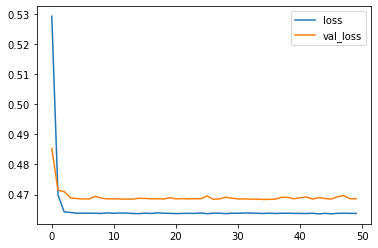

In [89]:
metricas[['loss','val_loss']].plot()

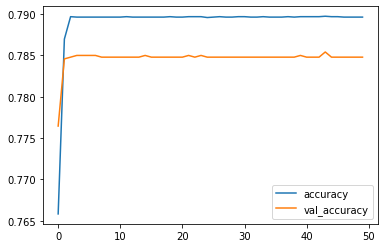

In [90]:
metricas[['accuracy','val_accuracy']].plot()

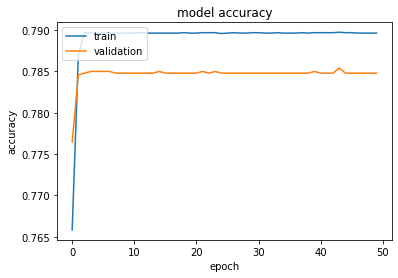

In [91]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [92]:
modelo.evaluate(X_test, y_test, verbose = 0)

[0.4612252712249756, 0.7903333306312561]

## Preparar el Modelo para Despliegue

In [93]:
epocas = len(metricas)

Notar que el ajuste se hace con todos los datos

In [94]:
X_scaled = scaler.fit_transform(X)

In [95]:
X_scaled[0].shape

(4,)

In [101]:
'''modelo = Sequential()
modelo.add(Dense(units = 4,
                 activation = 'relu',
                input_shape= X_scaled.shape[1:]))

# Ultima capa para clasificación multi-clase
#   de las tres especies
modelo.add(Dense(units = 3,
                 activation = 'softmax'))

modelo.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])'''
# create final model
modelo = create_model(lyrs=[8], dr=0.2)

print(modelo.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
None


In [102]:
#modelo.fit(X_scaled, y, epochs = epocas)

modelo.fit(X_train, y_train, epochs=50, batch_size=32, 
                     validation_split=0.2, verbose=0)

In [103]:
modelo.save("modelo_rna.h5")

### Guardar el Escalador

In [104]:
import joblib

In [105]:
joblib.dump(scaler,'escalador_rna.pkl')

['escalador_rna.pkl']

## Proceso para predecir una flor nueva

In [106]:
from tensorflow.keras.models import load_model

**NOTA**

Puede ser que las siguientes instrucciones causen un error:

AttributeError: 'str' object has no attribute 'decode'

Si este es el caso hay que bajar la versión del paquete hp5y.  Se puede hacer de la siguiente forma:

pip install 'h5py==2.10.0' --force-reinstall

o con Conda:

conda install 'h5py==2.10.0'

In [108]:
modelo_rna = load_model("modelo_rna.h5")
escalador_rna = joblib.load("escalador_rna.pkl")

In [109]:
df.head(1)

,id,limit_bal,education,age,pay_sep,pay_ago,pay_jul,pay_jun,pay_may,pay_apr,...,pay_amt_ago,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,payment_next_month,months_late,sex_1,marriage_1,marriage_2
0,1,20000.0,2,24,2,2,0,0,0,0,...,689.0,0.0,0.0,0.0,0.0,1,2,1,0,0


In [110]:
cliente_muestra = {'age':23,              
                   'months_late':2,
                   'pay_amt_may':35000,
                   'pay_amt_jun':10000}

In [111]:
cliente_muestra.keys()

dict_keys(['age', 'months_late', 'pay_amt_may', 'pay_amt_jun'])

In [112]:
codificador.classes_

array([0, 1], dtype=int64)

In [113]:
def devuelve_prediccion(modelo, escalador, muestra_json):
    
    # Si fueran muchas más características,
    #   probablemente sería bueno codificar
    #   una iteración que contruya este arreglo
    
    age = muestra_json['age']
    months_late = muestra_json['months_late']
    pay_amt_may = muestra_json['pay_amt_may']
    pay_amt_jun = muestra_json['pay_amt_jun']
    
    cliente = [[age, months_late,
             pay_amt_may, pay_amt_jun]]
    
    cliente = escalador.transform(cliente)
    
    clases = np.array([0,1])
    
    clase_ind = np.argmax(modelo.predict(cliente), axis=-1)
    
    return clases[clase_ind][0]
                    

In [114]:
devuelve_prediccion(modelo_rna,
                    escalador_rna,
                    cliente_muestra)

0

# CODIGO PARA DESPLIEGUE:

In [115]:
from tensorflow.keras.models import load_model
import joblib


modelo_flor = load_model("modelo_rna.h5")
escalador_flor = joblib.load("escalador_rna.pkl") 

def devuelve_prediccion(modelo, escalador, muestra_json):
    
    age = muestra_json['age']
    months_late = muestra_json['months_late']
    pay_amt_may = muestra_json['pay_amt_may']
    pay_amt_jun = muestra_json['pay_amt_jun']
    
    cliente = [[age, months_late,
             pay_amt_may, pay_amt_jun]]
    
    cliente = escalador.transform(cliente)
    
    clases = np.array([0,0])
    
    clase_ind = np.argmax(modelo.predict(cliente), axis=-1)
    
    return clases[clase_ind][0]

    

In [116]:
cliente_muestra = {'age':23,              
                   'months_late':2,
                   'pay_amt_may':35000,
                   'pay_amt_jun':10000}